# Image stats and image processing
This notebook follows on from the fundamentals notebook.

This will introduce some simple stats, smoothing, and basic image processing.

But first let us include what we need to include and load up our test image.

In [2]:
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import video # some video stuff
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

# somthing

Let's grab an image

In [3]:
input_image=cv2.imread('noidea.jpg')

## Noise reduction
Noise reduction can take many forms. The first involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing. Or put another way, how many pixels are in our window.

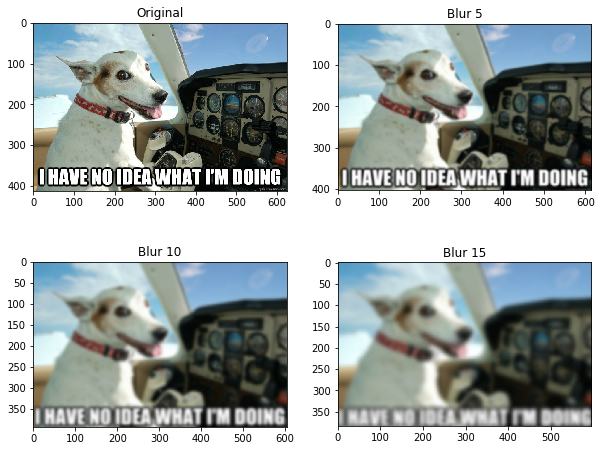

In [15]:
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original')

for i in range(1, 4):
    plt.subplot(2,2,i+1)
    d = i*5
    img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
    plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))
    plt.title('Blur {}'.format(d))

# d=3
# img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

# plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

- salt n pepper noise
- median filter - convolution


## Edges

Edge detection is the final image processing technique we're going to look at in this tutorial.

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by **convolution**, and indeed **convolutional neural networks** are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. You can read more about the background to Sobel here in the OpenCV docs [http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html]. 

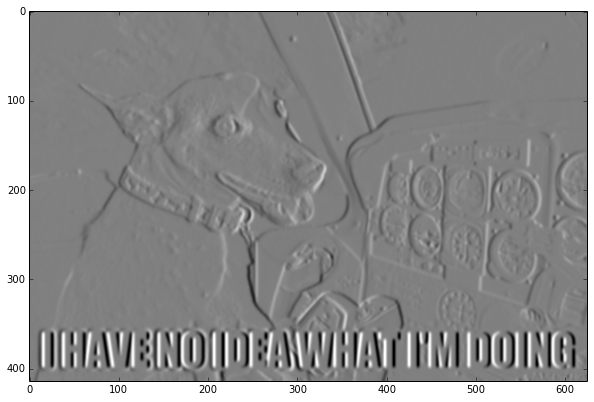

In [21]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference

Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

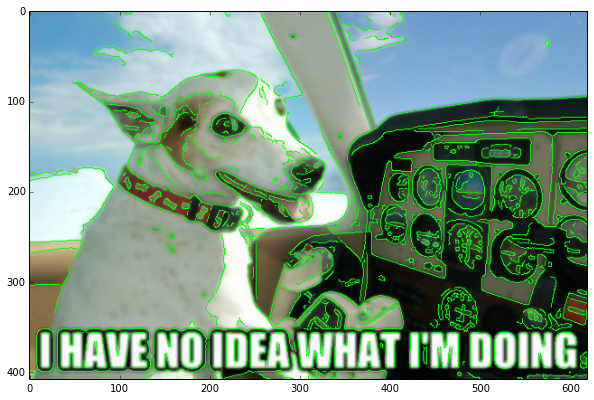

In [22]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

[Previous](2%20Fundamentals.ipynb) [Next](4%20Features.ipynb)